In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from utils import computeBoundaries, plot_and_segment_cube_signals

%matplotlib notebook

In [2]:
def plot_signals(base_path, cube_numbers, excel_path='./experiment_parameters.xlsx', plot_segmentation=False):
    # Load parameters from Excel into a dictionary
    xl = pd.ExcelFile(excel_path)
    params_dict = {sheet_name: xl.parse(sheet_name)[['Speed (mm/s)', 'Power (W)', 'Power perc (%)']].to_dict('records') for sheet_name in xl.sheet_names}
    
    # Initialize the dictionary to hold the segmented data tensors
    segmented_data_dict = {}
    
    for cube_number in cube_numbers:
        print(f'Working on cube {cube_number}')
        plot_and_segment_cube_signals(base_path, params_dict, cube_number, segmented_data_dict, threshold=0.1, plot_signals=plot_segmentation)
        print('---' * 10)
    
    def extract_features(data):
        features = {}

        start_index = int(data.shape[0] * 0.)
        end_index = int(data.shape[0] * 1.)

        # Slice the data to remove the first and last 5%
        data_emission = np.mean(data[start_index:end_index, 0, :], axis=0)
        features['mean_emission'] = np.mean(data_emission, axis=0)
        features['std_emission'] = np.std(data_emission, axis=0)
        features['median_emission'] = np.median(data_emission, axis=0)
        features['95th_percentile_emission'] = np.percentile(data_emission, 95, axis=0)
        features['5th_percentile_emission'] = np.percentile(data_emission, 5, axis=0)
        features['skewness_emission'] = skew(data_emission, axis=0)

        data_reflection = np.mean(data[start_index:end_index, 1, :], axis=0)
        features['mean_reflection'] = np.mean(data_reflection, axis=0)
        features['std_reflection'] = np.std(data_reflection, axis=0)
        features['median_reflection'] = np.median(data_reflection, axis=0)
        features['95th_percentile_reflection'] = np.percentile(data_reflection, 95, axis=0)
        features['5th_percentile_reflection'] = np.percentile(data_reflection, 5, axis=0)
        features['skewness_reflection'] = skew(data_reflection, axis=0)

        return features
    
    features_list = []
    label_list = []
    powers = []
    speeds = []

    for key, value in segmented_data_dict.items():
        power, speed, _ = key
        extracted_features = extract_features(value)
        feats = [v for k, v in extracted_features.items()]
        
        features_list.append(np.reshape(feats, (1, len(feats))))
        label_list.append((power, speed))
        powers.append(power)
        speeds.append(speed)

    plot_features_vs_speed(features_list, label_list)

def plot_features_vs_speed(features_list, label_list):
    # Convert the features list to a numpy array for easier manipulation
    features_array = np.vstack(features_list)
    feature_names = ['Mean Emission', 'Std Emission', 'Median Emission', '95th Percentile Emission', 
                     '5th Percentile Emission', 'Skewness Emission', 'Mean Reflection', 
                     'Std Reflection', 'Median Reflection', '95th Percentile Reflection', 
                     '5th Percentile Reflection', 'Skewness Reflection']
    
    # Extract unique powers
    powers = sorted(set([label[0] for label in label_list]))
    
    for power in powers:
        # Filter data for the current power
        indices = [i for i, label in enumerate(label_list) if label[0] == power]
        speeds = [label_list[i][1] for i in indices]
        power_features = features_array[indices, :]
        
        # Create a plot for the current power
        plt.figure(figsize=(15, 10))
        for feature_idx, feature_name in enumerate(feature_names):
            plt.subplot(4, 3, feature_idx + 1)
            plt.scatter(speeds, power_features[:, feature_idx])
            plt.xlabel('Speed (mm/s)')
            plt.ylabel(feature_name)
            plt.title(f'{feature_name} vs Speed')
            plt.grid(True)
        
        plt.suptitle(f'Features vs Speed for Power {power} W')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

Working on cube 3


<IPython.core.display.Javascript object>


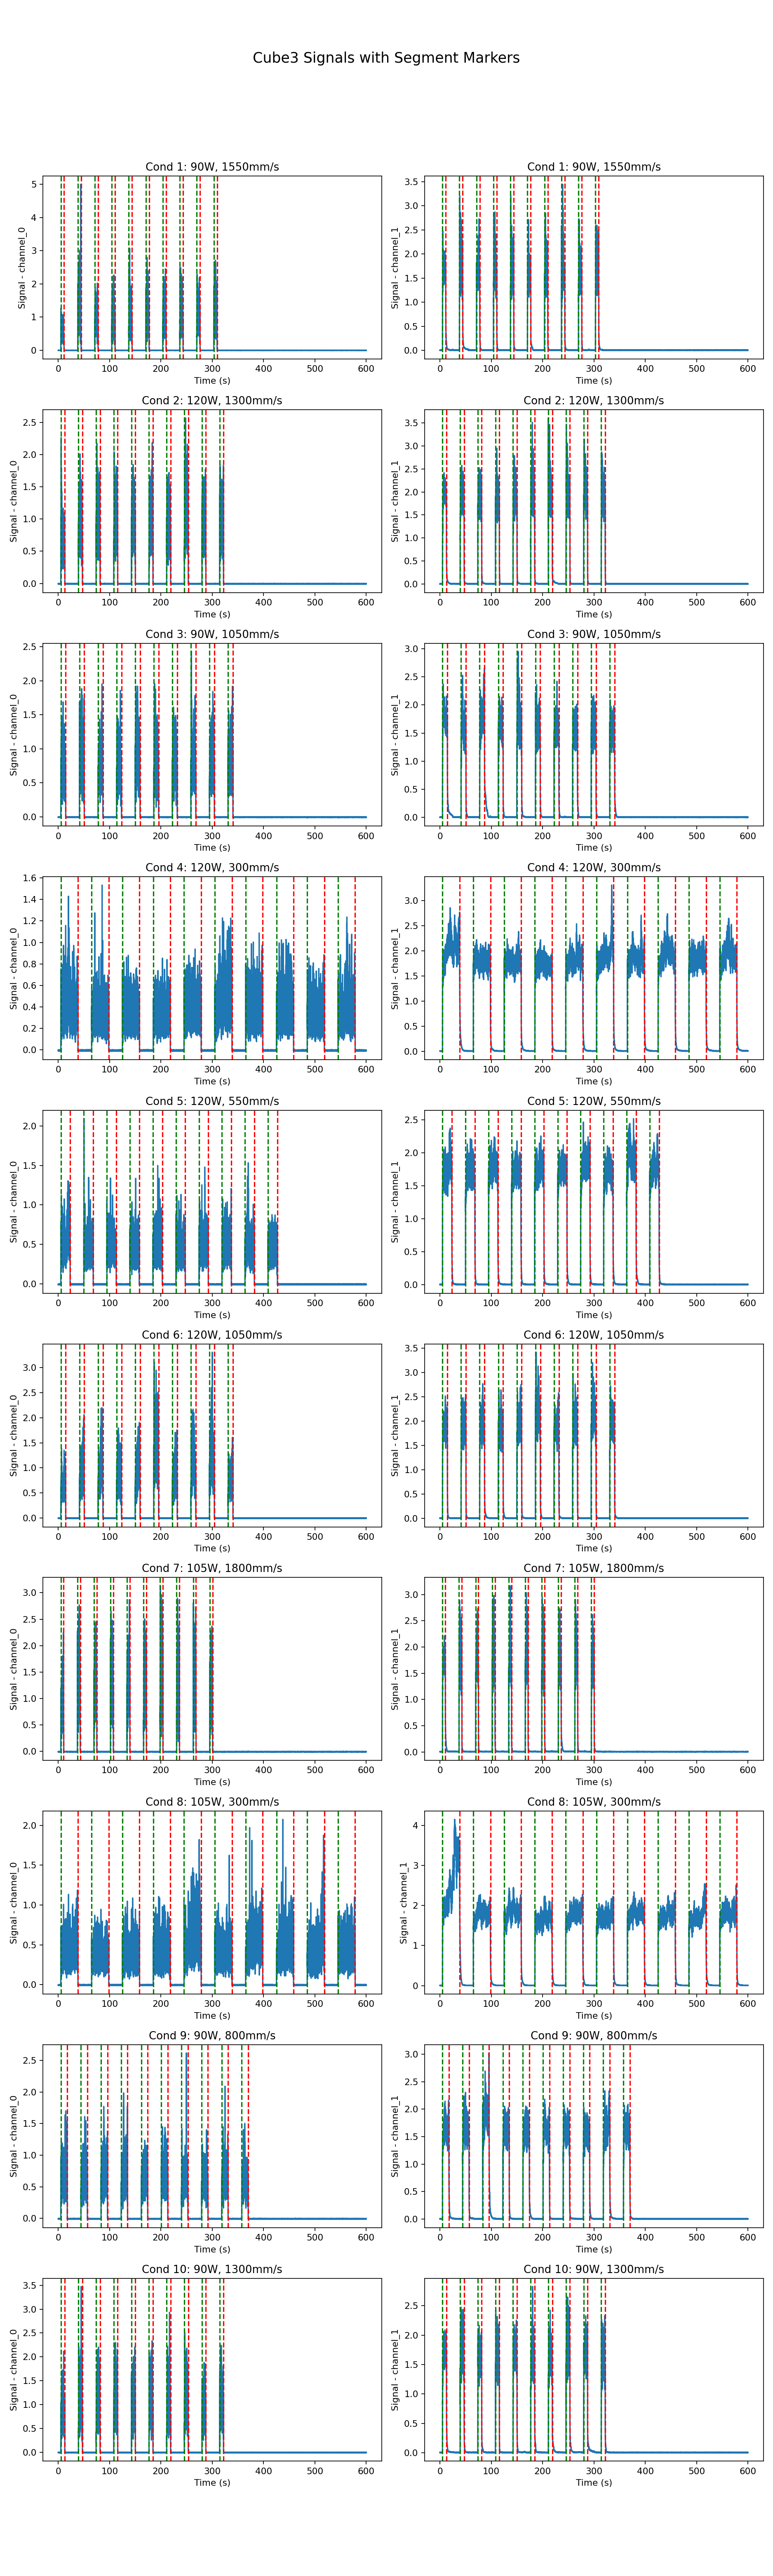

Condition 1: Found 10 segments, Avg. Size: 1284.40, Std. Dev: 8.82
Segment Max Size: 1288, Segment Min Size: 1258
Condition 2: Found 10 segments, Avg. Size: 1536.70, Std. Dev: 1.10
Segment Max Size: 1538, Segment Min Size: 1535
Condition 3: Found 10 segments, Avg. Size: 1901.20, Std. Dev: 2.23
Segment Max Size: 1903, Segment Min Size: 1895
Condition 4: Found 10 segments, Avg. Size: 6663.80, Std. Dev: 1.08
Segment Max Size: 6666, Segment Min Size: 6662
Condition 5: Found 10 segments, Avg. Size: 3634.20, Std. Dev: 0.75
Segment Max Size: 3635, Segment Min Size: 3633
Condition 6: Found 10 segments, Avg. Size: 1904.40, Std. Dev: 0.66
Segment Max Size: 1905, Segment Min Size: 1903
Condition 7: Found 10 segments, Avg. Size: 1110.80, Std. Dev: 0.87
Segment Max Size: 1112, Segment Min Size: 1109
Condition 8: Found 10 segments, Avg. Size: 6664.20, Std. Dev: 0.87
Segment Max Size: 6666, Segment Min Size: 6663
Condition 9: Found 10 segments, Avg. Size: 2497.80, Std. Dev: 1.33
Segment Max Size: 250

<IPython.core.display.Javascript object>


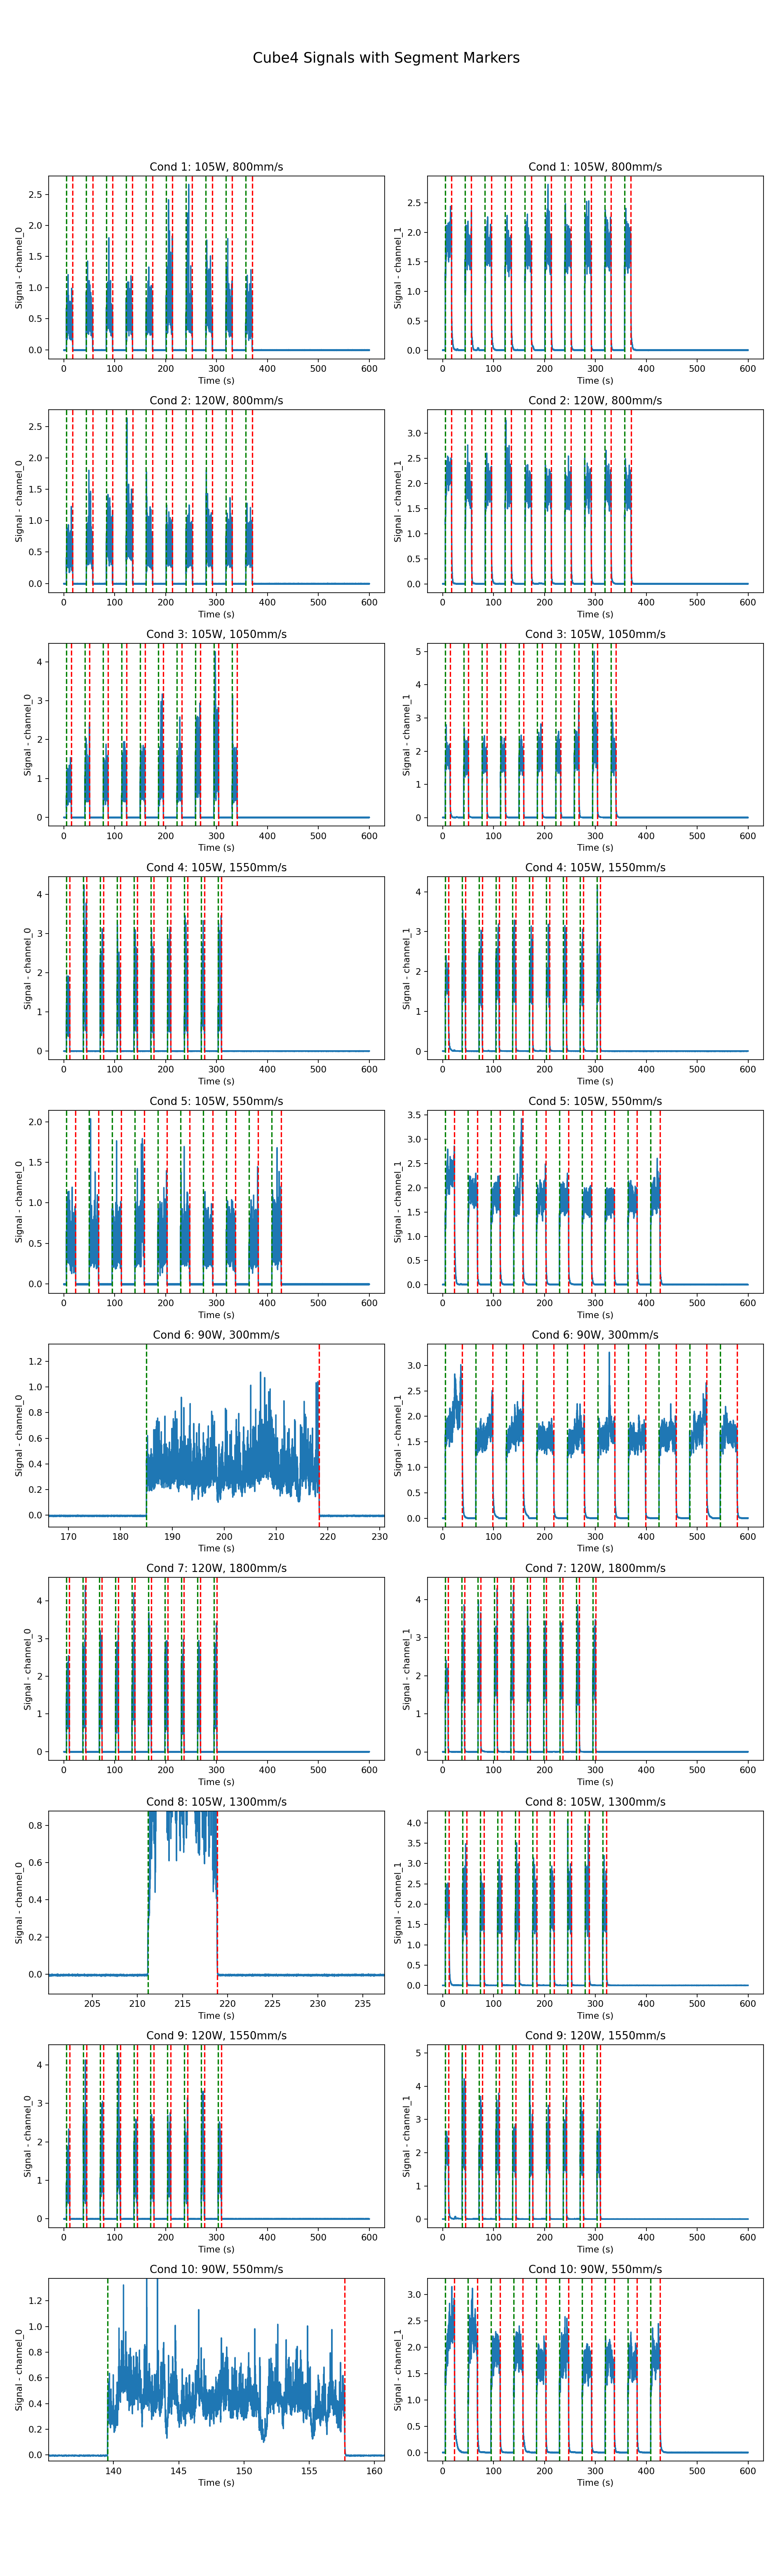

Condition 1: Found 10 segments, Avg. Size: 2494.10, Std. Dev: 9.08
Segment Max Size: 2498, Segment Min Size: 2467
Condition 2: Found 10 segments, Avg. Size: 2498.00, Std. Dev: 1.00
Segment Max Size: 2500, Segment Min Size: 2497
Condition 3: Found 10 segments, Avg. Size: 1904.30, Std. Dev: 0.64
Segment Max Size: 1905, Segment Min Size: 1903
Condition 4: Found 10 segments, Avg. Size: 1289.50, Std. Dev: 0.50
Segment Max Size: 1290, Segment Min Size: 1289
Condition 5: Found 10 segments, Avg. Size: 3633.90, Std. Dev: 1.51
Segment Max Size: 3636, Segment Min Size: 3631
Condition 6: Found 10 segments, Avg. Size: 6664.00, Std. Dev: 1.41
Segment Max Size: 6667, Segment Min Size: 6662
Condition 7: Found 10 segments, Avg. Size: 1111.40, Std. Dev: 0.66
Segment Max Size: 1113, Segment Min Size: 1111
Condition 8: Found 10 segments, Avg. Size: 1537.50, Std. Dev: 0.67
Segment Max Size: 1539, Segment Min Size: 1537
Condition 9: Found 10 segments, Avg. Size: 1290.10, Std. Dev: 1.04
Segment Max Size: 129

<IPython.core.display.Javascript object>


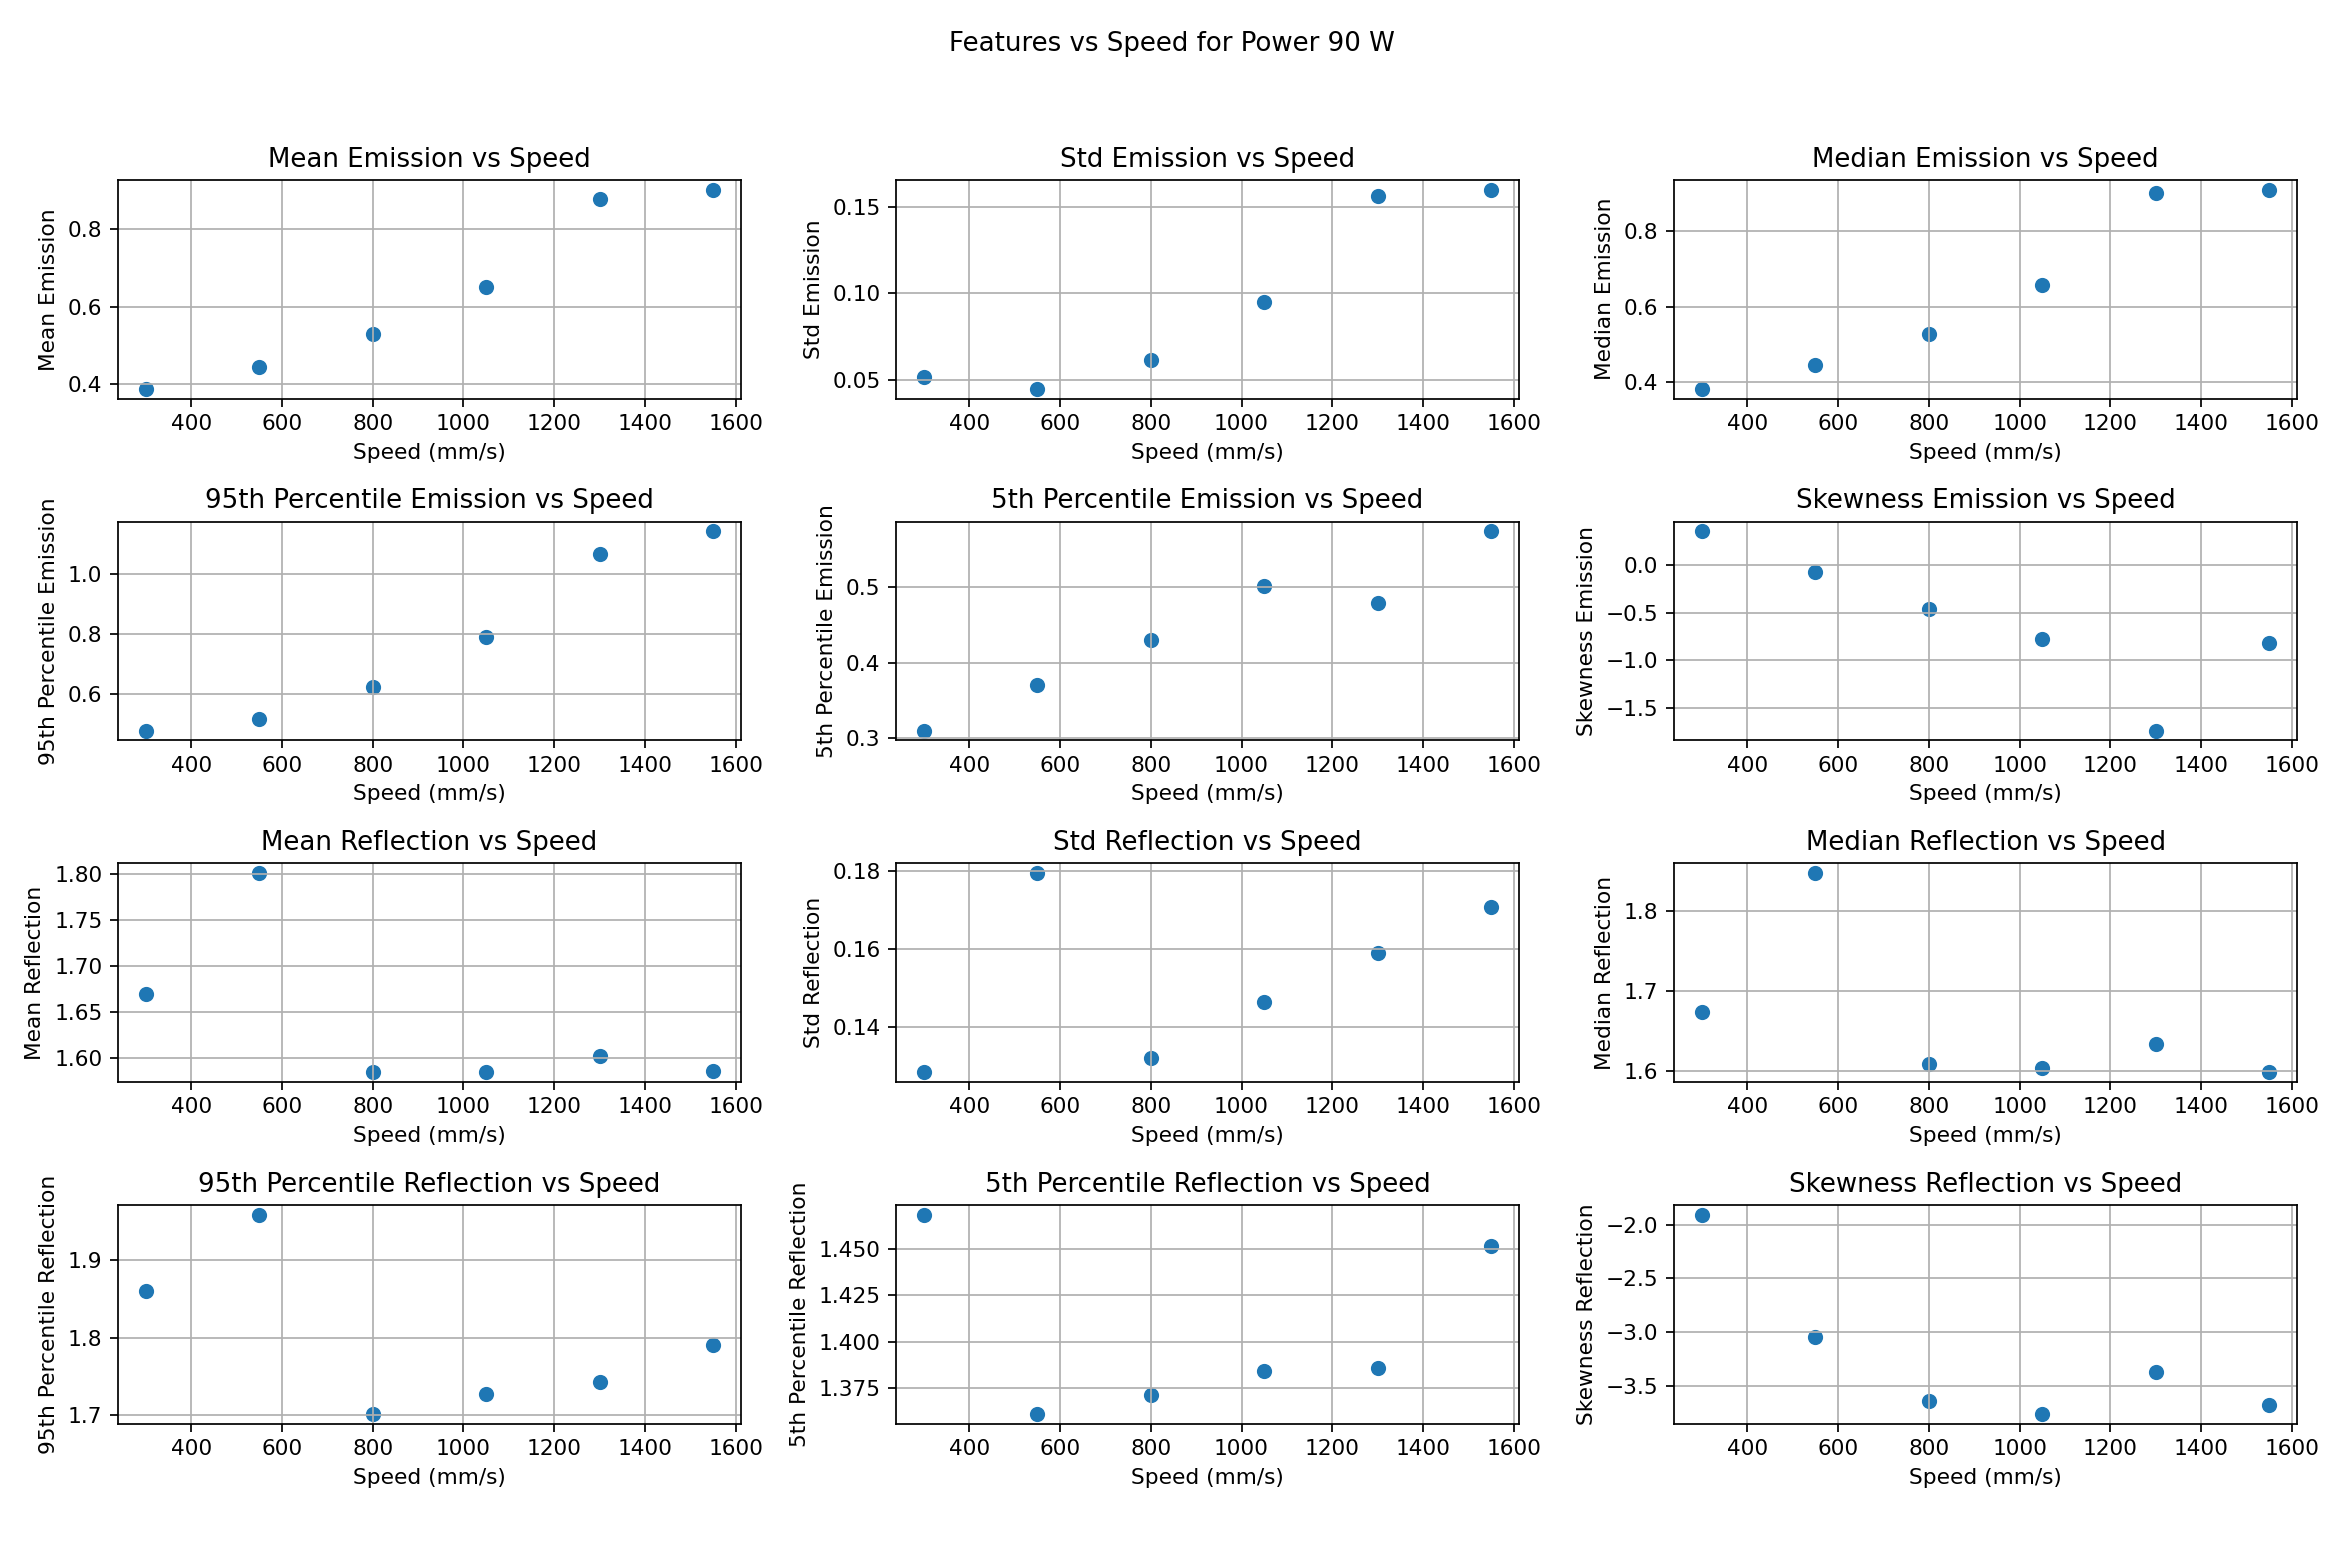

<IPython.core.display.Javascript object>


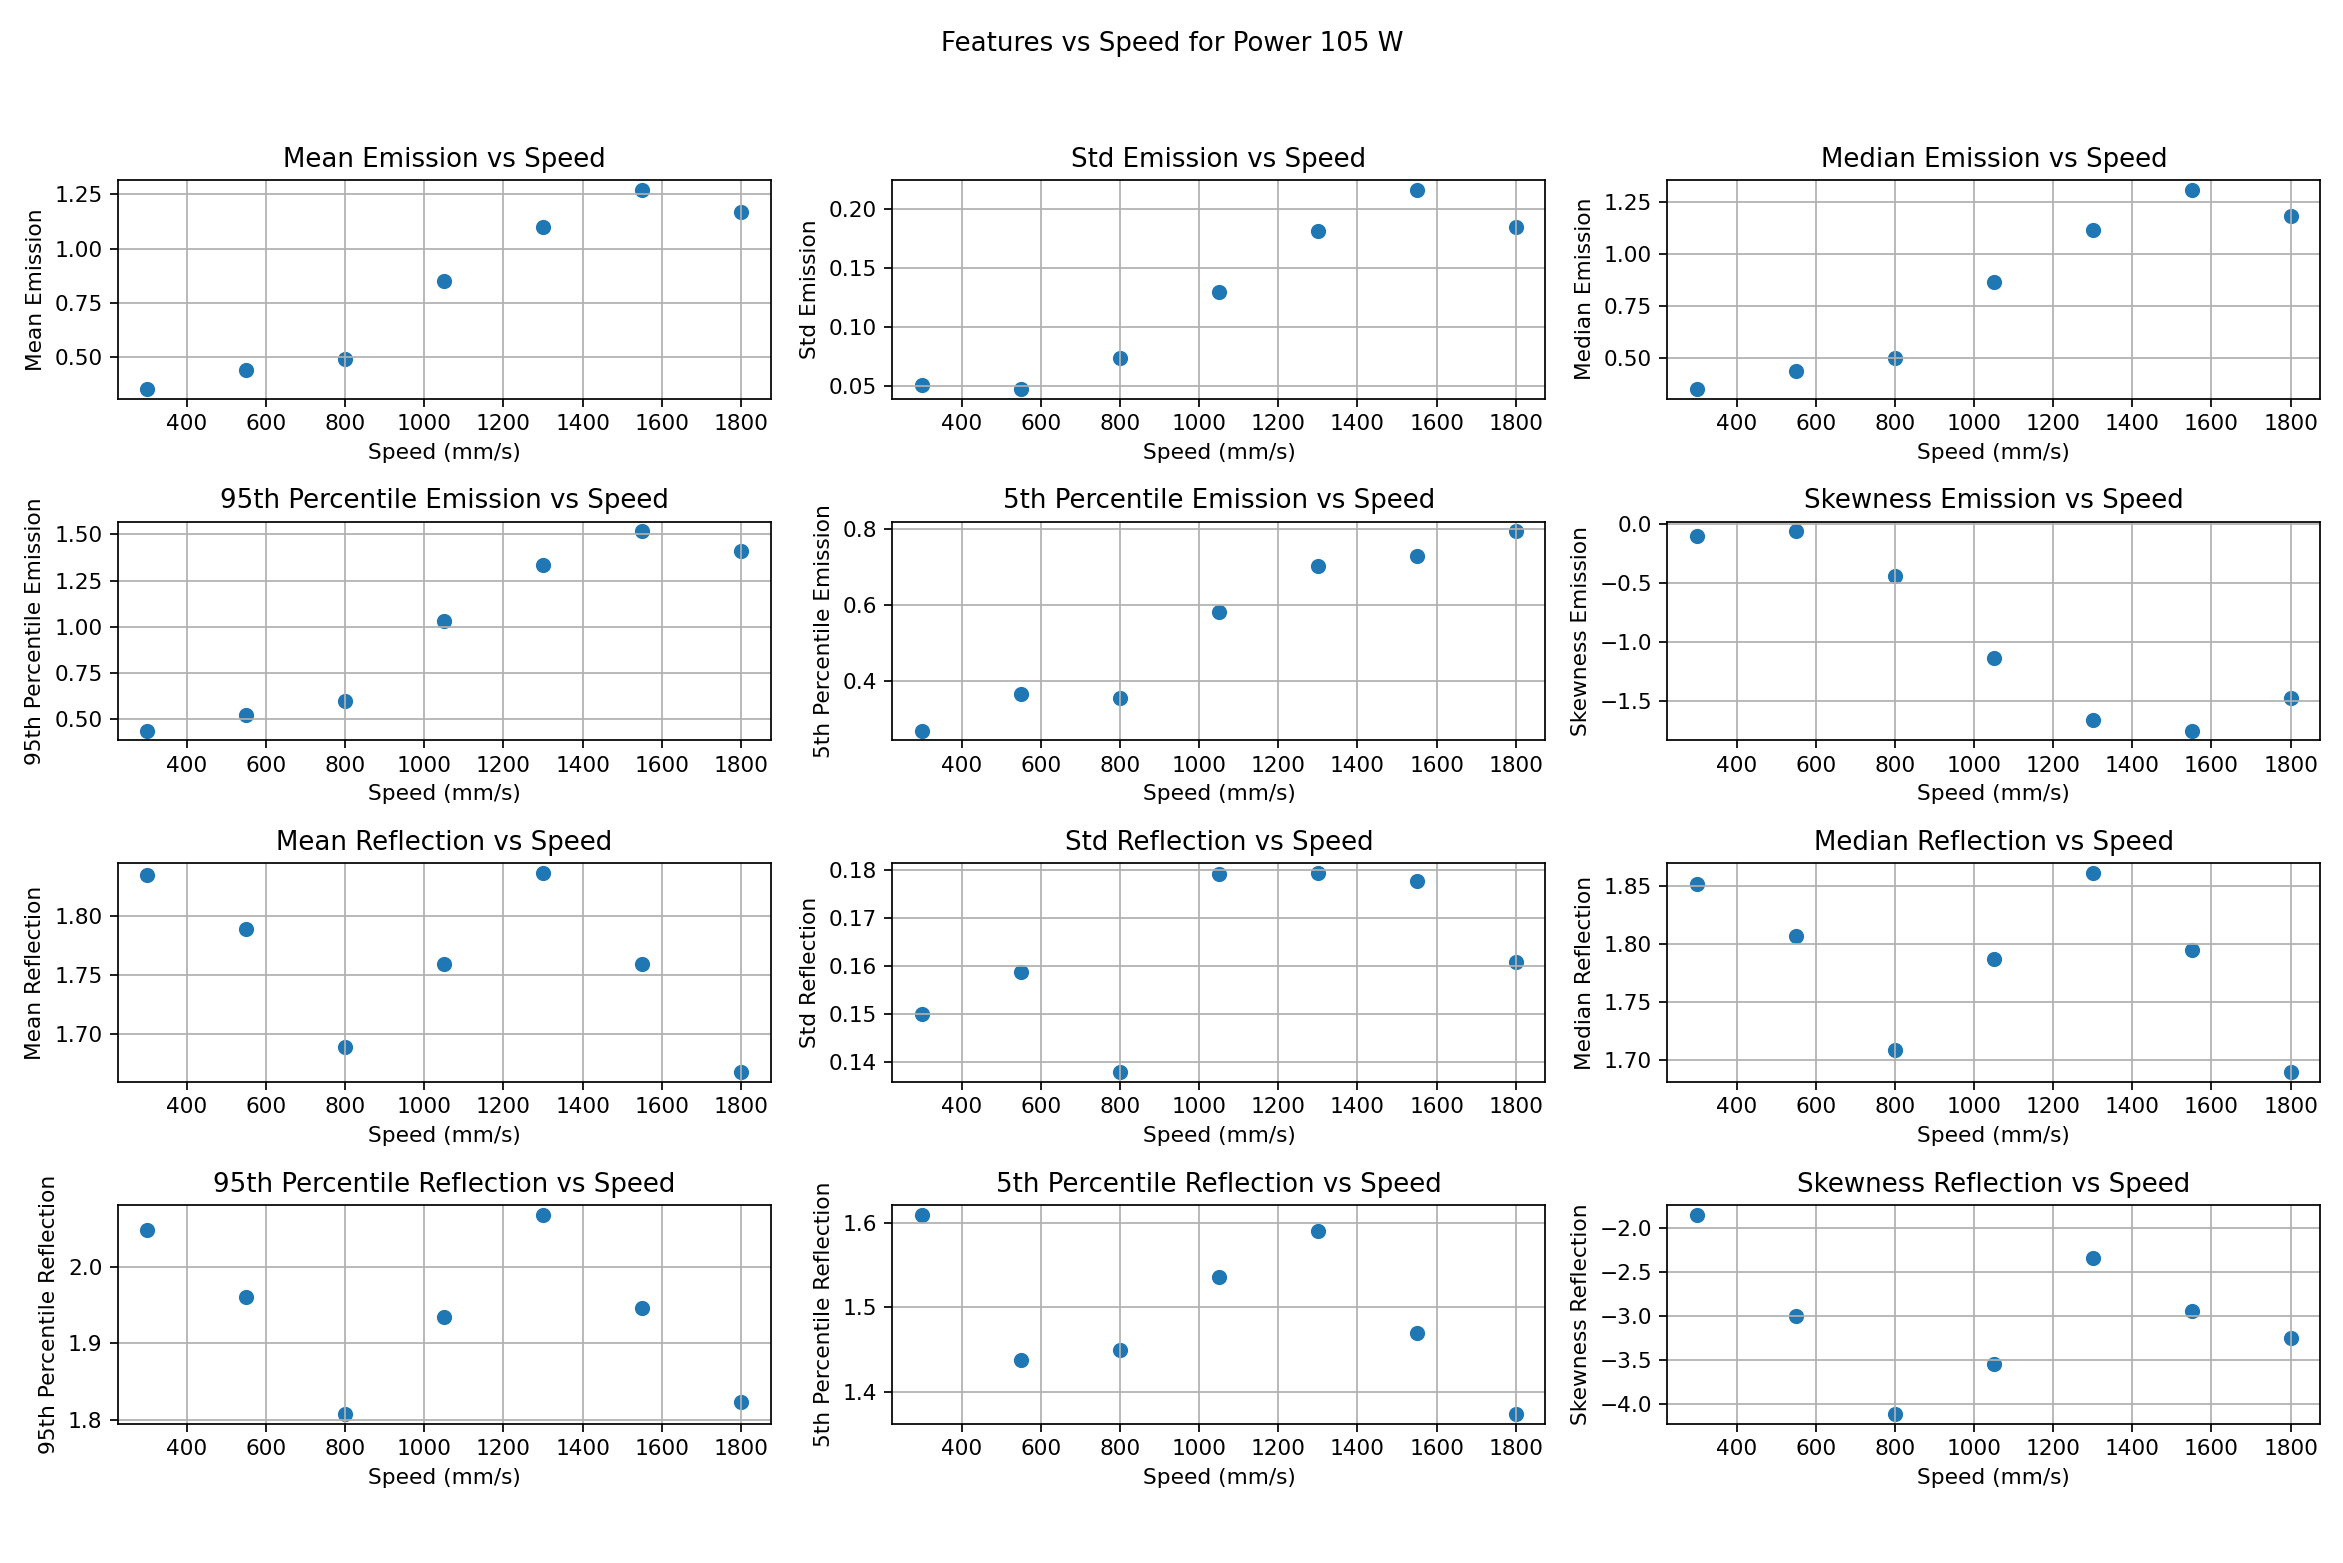

<IPython.core.display.Javascript object>


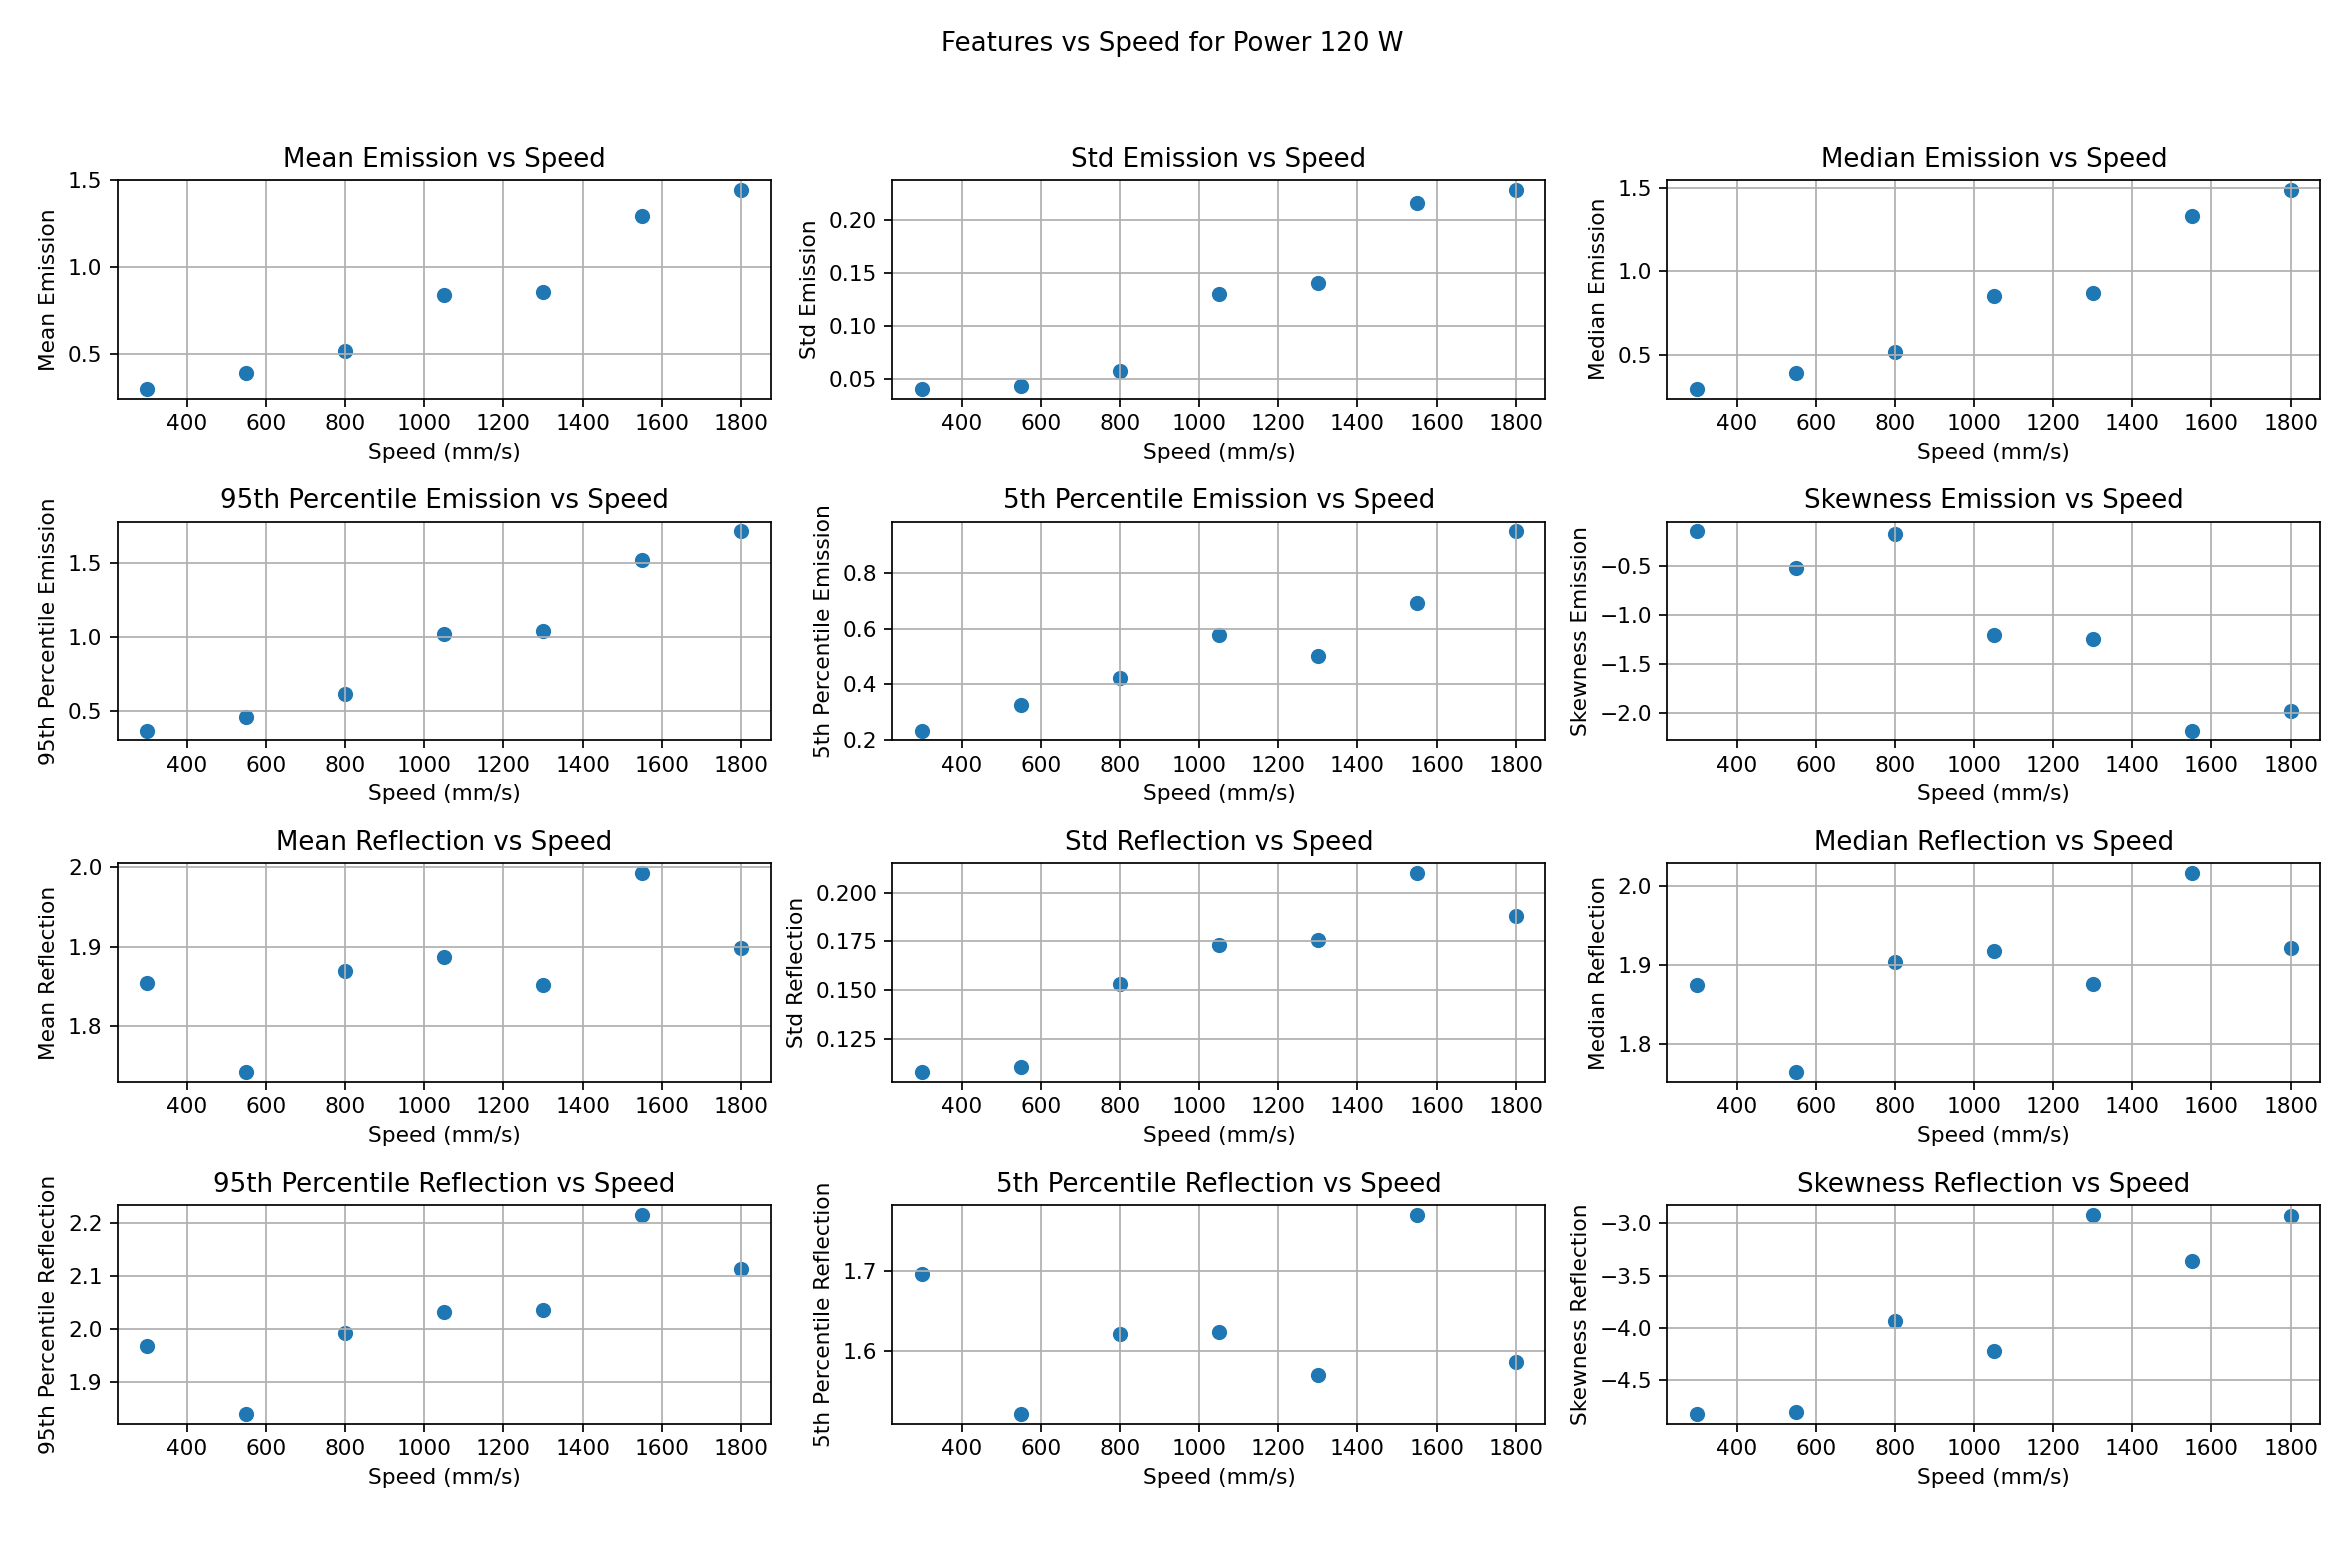

In [3]:
plot_signals('./Data/Neuchatel_Ti64/', [3, 4], excel_path='./experiment_parameters.xlsx', plot_segmentation=False)


Working on cube 7
Condition 1: Found 10 segments, Avg. Size: 6660.00, Std. Dev: 8.71
Segment Max Size: 6664, Segment Min Size: 6634
Condition 2: Found 10 segments, Avg. Size: 1217.40, Std. Dev: 0.66
Segment Max Size: 1218, Segment Min Size: 1216
Condition 3: Found 10 segments, Avg. Size: 1347.10, Std. Dev: 0.70
Segment Max Size: 1348, Segment Min Size: 1346
Condition 4: Found 10 segments, Avg. Size: 5275.30, Std. Dev: 1.10
Segment Max Size: 5277, Segment Min Size: 5274
Condition 5: Found 10 segments, Avg. Size: 2144.30, Std. Dev: 0.64
Segment Max Size: 2145, Segment Min Size: 2143
Condition 6: Found 10 segments, Avg. Size: 2876.40, Std. Dev: 0.66
Segment Max Size: 2878, Segment Min Size: 2876
Condition 7: Found 10 segments, Avg. Size: 1711.40, Std. Dev: 0.66
Segment Max Size: 1713, Segment Min Size: 1711
Condition 8: Found 10 segments, Avg. Size: 3722.10, Std. Dev: 0.70
Segment Max Size: 3723, Segment Min Size: 3721
Condition 9: Found 10 segments, Avg. Size: 1162.80, Std. Dev: 1.08
Seg

<IPython.core.display.Javascript object>


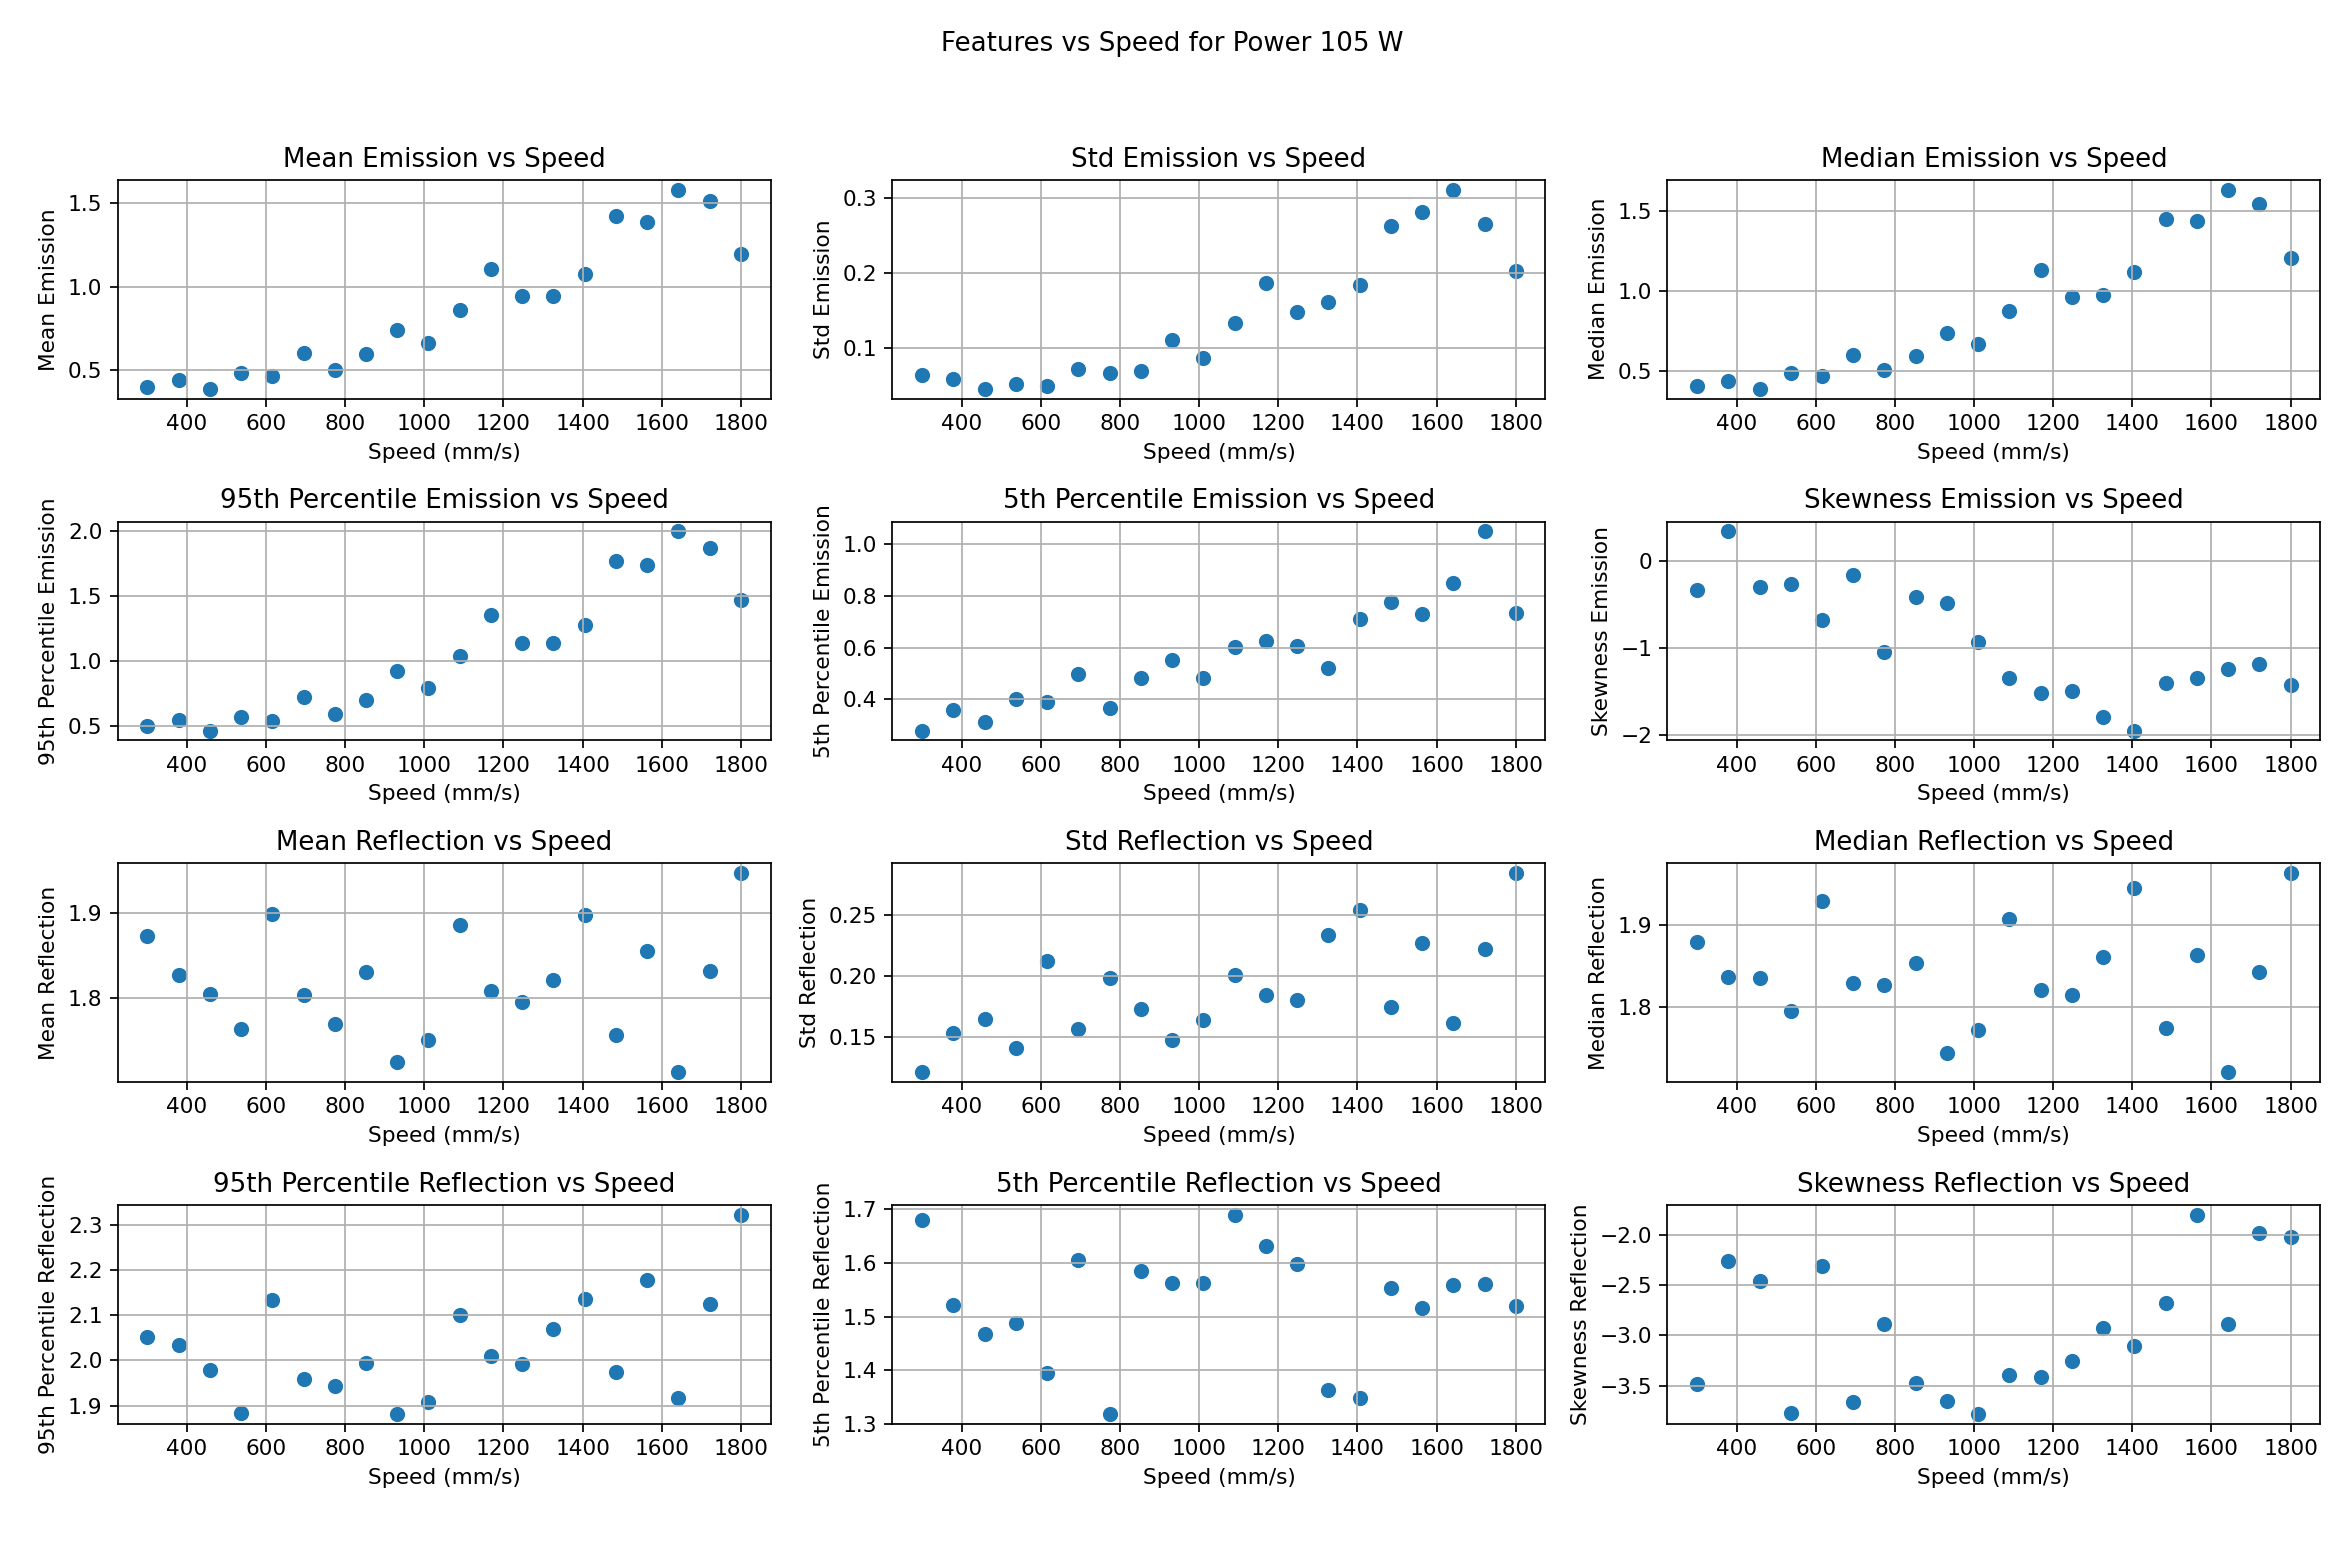

In [4]:
plot_signals('./Data/Neuchatel_Ti64/', [7, 8], excel_path='./experiment_parameters.xlsx', plot_segmentation=False)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from utils import computeBoundaries, plot_and_segment_cube_signals

def plot_signals(base_path, cube_numbers, excel_path='./experiment_parameters.xlsx', plot_segmentation=False):
    # Load parameters from Excel into a dictionary
    xl = pd.ExcelFile(excel_path)
    params_dict = {sheet_name: xl.parse(sheet_name)[['Speed (mm/s)', 'Power (W)', 'Power perc (%)']].to_dict('records') for sheet_name in xl.sheet_names}
    
    # Initialize the dictionary to hold the segmented data tensors
    segmented_data_dict = {}
    
    for cube_number in cube_numbers:
        print(f'Working on cube {cube_number}')
        plot_and_segment_cube_signals(base_path, params_dict, cube_number, segmented_data_dict, threshold=0.1, plot_signals=plot_segmentation)
        print('---' * 10)
    
    def extract_features(data):
        features = {}
        
        data_emission = np.mean(data[:, 0, :], axis=0)
        features['mean_emission'] = np.mean(data_emission, axis=0)
        features['std_emission'] = np.std(data_emission, axis=0)
        features['median_emission'] = np.median(data_emission, axis=0)
        features['95th_percentile_emission'] = np.percentile(data_emission, 95, axis=0)
        features['5th_percentile_emission'] = np.percentile(data_emission, 5, axis=0)
        features['skewness_emission'] = skew(data_emission, axis=0)
        
        data_reflection = np.mean(data[:, 1, :], axis=0)
        features['mean_reflection'] = np.mean(data_reflection, axis=0)
        features['std_reflection'] = np.std(data_reflection, axis=0)
        features['median_reflection'] = np.median(data_reflection, axis=0)
        features['95th_percentile_reflection'] = np.percentile(data_reflection, 95, axis=0)
        features['5th_percentile_reflection'] = np.percentile(data_reflection, 5, axis=0)
        features['skewness_reflection'] = skew(data_reflection, axis=0)
        
        return features
    
    features_list = []
    label_list = []
    powers = []
    speeds = []

    for key, value in segmented_data_dict.items():
        power, speed, _ = key
        extracted_features = extract_features(value)
        feats = [v for k, v in extracted_features.items()]
        
        features_list.append(np.reshape(feats, (1, len(feats))))
        label_list.append((power, speed))
        powers.append(power)
        speeds.append(speed)

    plot_features_vs_speed(features_list, label_list)

def plot_features_vs_speed(features_list, label_list):
    # Convert the features list to a numpy array for easier manipulation
    features_array = np.vstack(features_list)
    feature_names = ['Mean Emission', 'Std Emission', 'Median Emission', '95th Percentile Emission', 
                     '5th Percentile Emission', 'Skewness Emission', 'Mean Reflection', 
                     'Std Reflection', 'Median Reflection', '95th Percentile Reflection', 
                     '5th Percentile Reflection', 'Skewness Reflection']
    
    # Extract unique powers
    powers = sorted(set([label[0] for label in label_list]))
    
    for power in powers:
        # Filter data for the current power
        indices = [i for i, label in enumerate(label_list) if label[0] == power]
        speeds = [label_list[i][1] for i in indices]
        power_features = features_array[indices, :]

        # Sort speeds and corresponding features
        sorted_indices = np.argsort(speeds)
        speeds = np.array(speeds)[sorted_indices]
        power_features = power_features[sorted_indices, :]
        
        # Create a plot for the current power
        plt.figure(figsize=(15, 10))
        for feature_idx, feature_name in enumerate(feature_names):
            plt.plot(speeds, power_features[:, feature_idx], label=feature_name)

        plt.xlabel('Speed (mm/s)')
        plt.ylabel('Feature Value')
        plt.title(f'Features vs Speed for Power {power} W')
        plt.legend()
        plt.grid(True)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_signals('./Data/Neuchatel_Ti64/', [7, 8], excel_path='./experiment_parameters.xlsx', plot_segmentation=False)


In [ ]:
plot_signals('./Data/Neuchatel_Ti64/', [3, 4], excel_path='./experiment_parameters.xlsx', plot_segmentation=False)
